***
<font size="6"><center><b> HD-CapsNet: A Hierarchical Deep Capsule Network for Image Classification </b></center></font>
***

**Changing Model Architecture**
- **(Mod-3.1)** 32D>16D>8D (Coarse>Medium>FINE) use skip connections between Secondary Capsules $Concatenate([P_{caps}, S_{coarse}])$ > input for $S_{medium}$ and $Concatenate([P_{caps}, S_{medium}])$ > input for $S_{fine}$
- With $L_{Cons}$

# Files and Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import backend as K

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

# Supporting Libraries:
    #Mathplot lib for ploting graphs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
    # numpy and pandas
import numpy as np
import pandas as pd
    #system
import os
import sys
import csv
    #import other libraries
import math
import random
from datetime import datetime
from treelib import Tree
    # ML model, Dataset and evalution metrics
sys.path.append('../../') ### adding system parth for src folder
from src import datasets # load datasets
from src import MixUp # load datasets
from src import MixUp_add_loss # load datasets
from src import metrics # load hierarchcial metrics
from src import sysenv # load hierarchcial metrics
from src import models # load machine learning models

    ## Tensorflow_docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

    # Auto reload local libraries if updated
%load_ext autoreload
%autoreload 2

# System information & GPU growth

In [2]:
systeminfo = sysenv.systeminfo()
print(systeminfo)


• Computer Name = posix
• Working Directory = /home/knoor/Downloads/RunningOnServer/HD-CapsNet_MTree/Training_and_Analysis/7_Marin_Tree
• Python Version = 3.9.16 (main, Mar  8 2023, 14:00:05) 
[GCC 11.2.0]
• TensorFlow Version = 2.8.4
• Keras Version = 2.8.0
• Current Environment = Not Using Anaconda


In [3]:
gpus = "0,1,2,3,4,5,6,7" ## Selecting Available gpus (Multi-GPUS)
gpus = "1" ## Selecting Available gpus (Single GPU)
gpugrowth = sysenv.gpugrowth(gpus = gpus) ## Limiting GPUS from OS environment
gpugrowth.memory_growth() #GPU memory growth

Following GPUS are selected =  1
Done: GPU PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


2023-04-14 09:29:00.086552: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 09:29:04.865544: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14075 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0


# Parameters

In [4]:
train_params = {"n_epochs" : 100,
                "batch_size": 32,
                "lr": 0.001, # Initial learning rate
                "lr_decay": 0.95, # Learning rate decay
                "decay_exe": 9, #learning rate decay execution epoch after
               }
model_params = {"optimizer": tf.keras.optimizers.Adam(train_params['lr']),
                "loss_function": models.MarginLoss(),
               }

# log directory

In [5]:
directory = sysenv.log_dir('7_Marine_Tree/HD_CapsNet/HD_CapsNet_WO-Lc')

# Import Dataset : Marine Tree Dataset

In [6]:
dataset = datasets.get_Marine_dataset(output_level='level_depth_3', # 'level_depth_3', 'level_depth_4', 'level_depth_5
#                                       dataset_path ='D:\Datasets\Marine_tree', ## Path to the dataset directory
                                      dataset_path ='/home/knoor/Downloads/RunningOnServer/H-CapsNet_Revision/Dataset/Marine_tree', ## Path to the dataset directory
                                      image_size=(64,64),
                                      batch_size=train_params['batch_size'],
                                      subtype='Combined',
                                      data_normalizing ='normalize',
                                      class_encoding = 'One_Hot_Encoder',
                                      data_augmantation = 'mixup'
                                     )

Example =  0


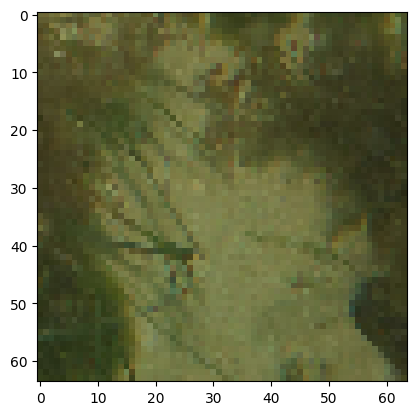

Coarse = {0: 0.0068034516, 1: 0.99319655}
Medium = {7: 0.0068034516, 9: 0.99319655}
Fine   = {15: 0.99319655, 33: 0.0068034516}
Example =  1


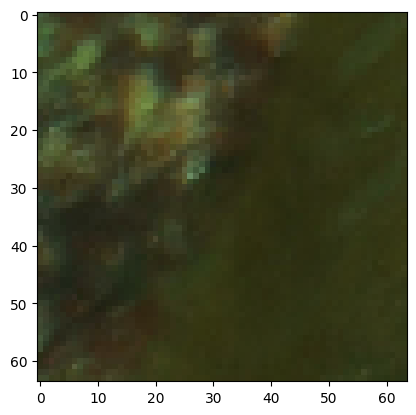

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.9201828, 33: 0.079817176}
Example =  2


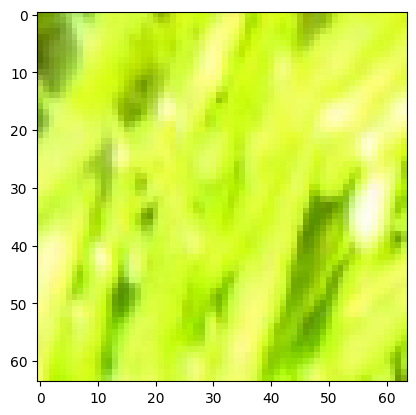

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {1: 0.9972133, 33: 0.002786696}
Example =  3


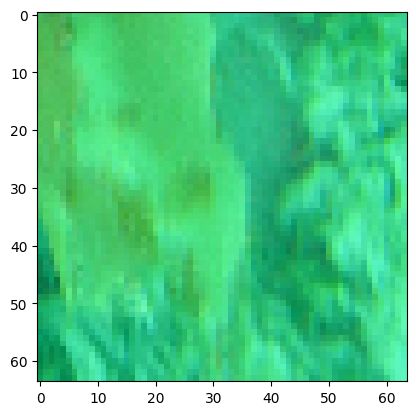

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  4


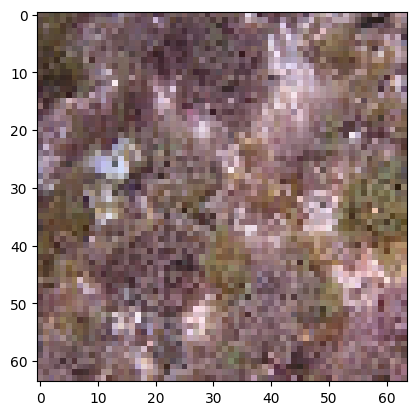

Coarse = {0: 1.0}
Medium = {1: 0.026941061, 7: 0.97305894}
Fine   = {4: 0.97305894, 32: 0.026941061}
Example =  5


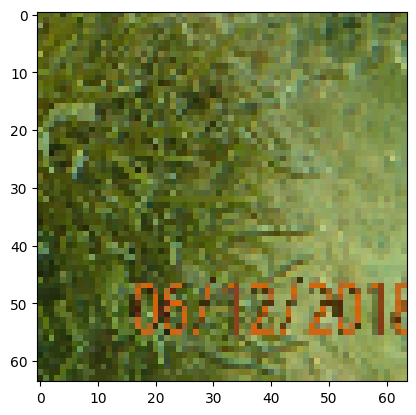

Coarse = {0: 0.8479989, 1: 0.15200108}
Medium = {7: 0.8479989, 9: 0.15200108}
Fine   = {15: 0.15200108, 33: 0.8479989}
Example =  6


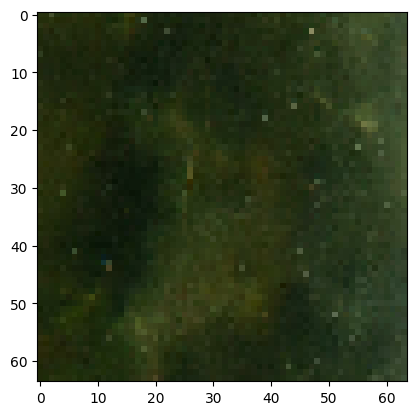

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 0.0001655817, 36: 0.9998344}
Example =  7


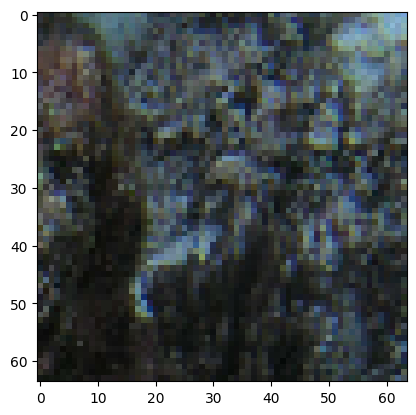

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.9998433, 33: 0.00015670061}
Example =  8


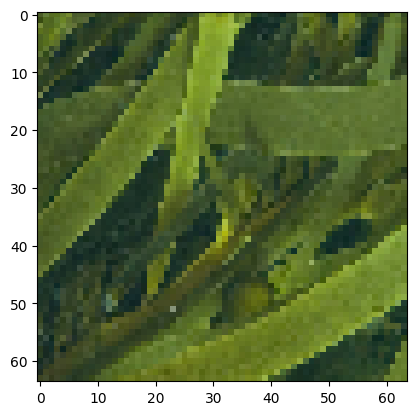

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  9


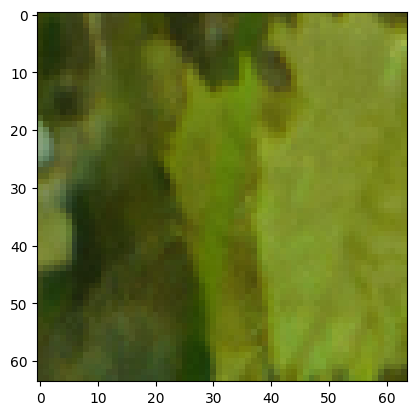

Coarse = {0: 1.0}
Medium = {6: 0.4558348, 7: 0.5441652}
Fine   = {25: 0.4558348, 33: 0.5441652}
Example =  10


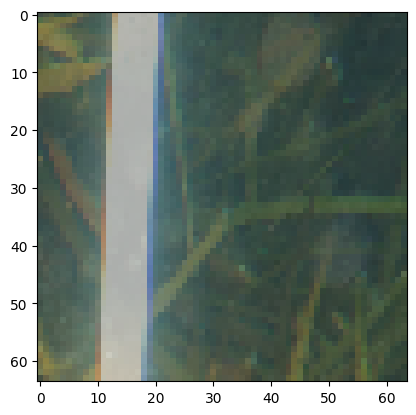

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  11


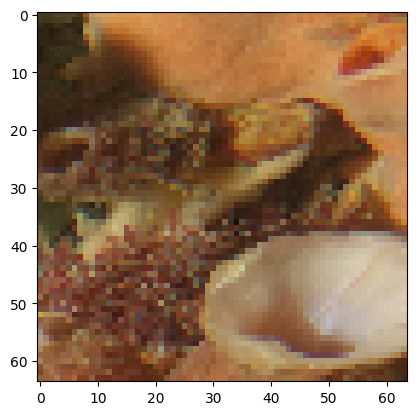

Coarse = {0: 1.0}
Medium = {5: 1.0, 7: 4.8304334e-09}
Fine   = {6: 4.8304334e-09, 17: 1.0}
Example =  12


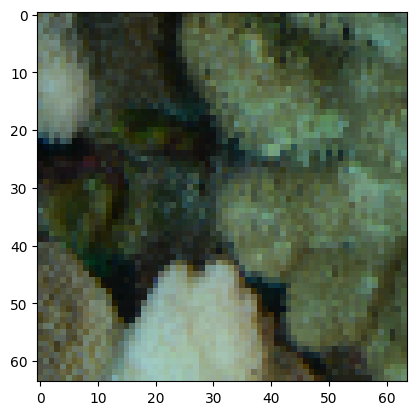

Coarse = {0: 1.0}
Medium = {1: 0.9999662, 7: 3.3770026e-05}
Fine   = {32: 0.9999662, 33: 3.3770026e-05}
Example =  13


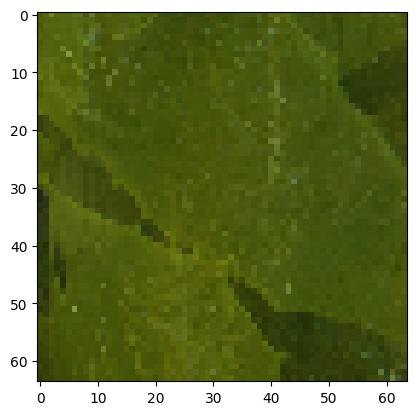

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  14


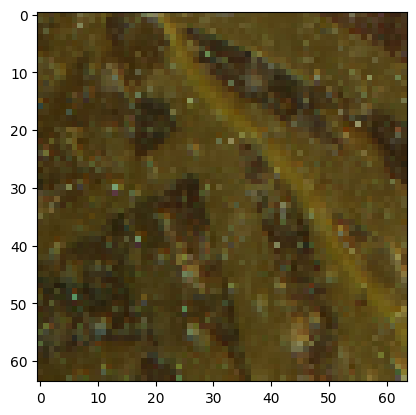

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.00025326014, 33: 0.99974674}
Example =  15


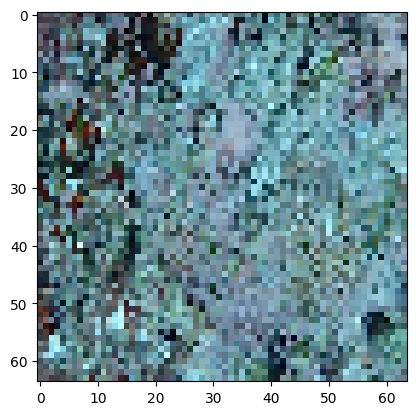

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  16


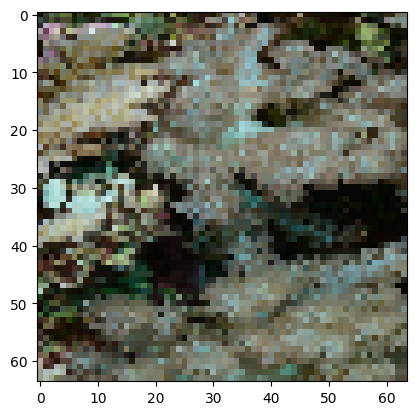

Coarse = {0: 0.9999998, 1: 1.7881393e-07}
Medium = {1: 0.9999998, 9: 1.7881393e-07}
Fine   = {15: 1.7881393e-07, 32: 0.9999998}
Example =  17


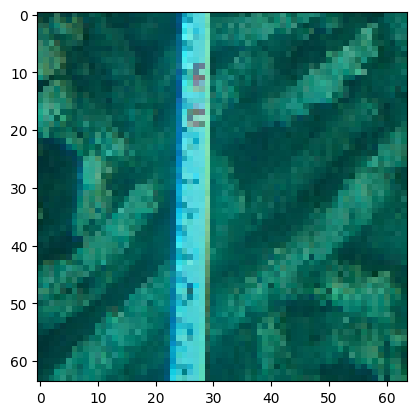

Coarse = {0: 0.010423124, 1: 0.9895769}
Medium = {7: 0.010423124, 9: 0.9895769}
Fine   = {12: 0.9895769, 33: 0.010423124}
Example =  18


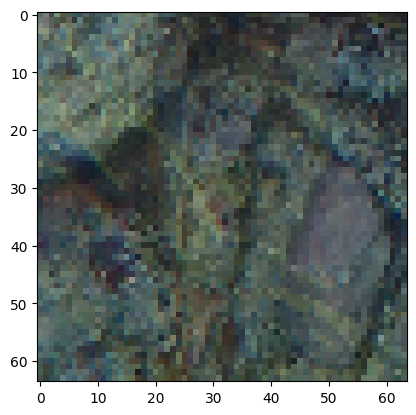

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.72568554, 33: 0.27431446}
Example =  19


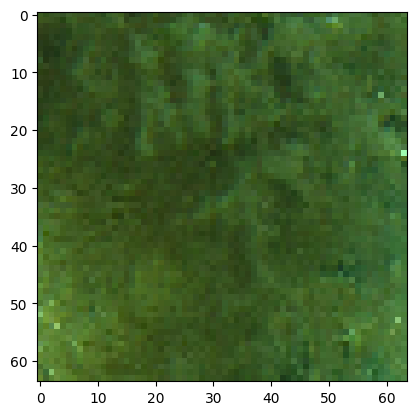

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 9.546606e-06, 36: 0.99999046}
Example =  20


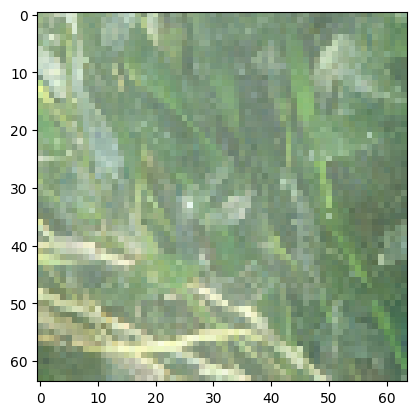

Coarse = {0: 0.5846587, 1: 0.41534132}
Medium = {6: 0.5846587, 9: 0.41534132}
Fine   = {15: 0.41534132, 25: 0.5846587}
Example =  21


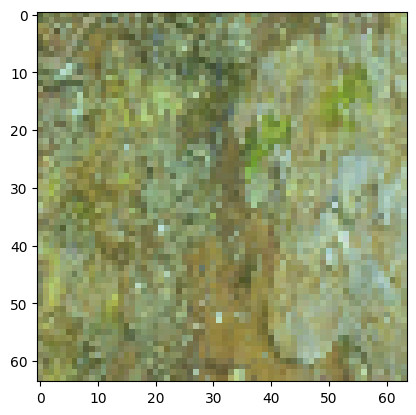

Coarse = {0: 1.0}
Medium = {0: 0.79721254, 7: 0.20278746}
Fine   = {28: 0.79721254, 33: 0.20278746}
Example =  22


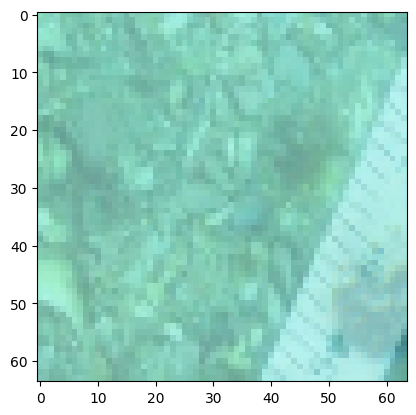

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {11: 0.3917957, 15: 0.6082043}
Example =  23


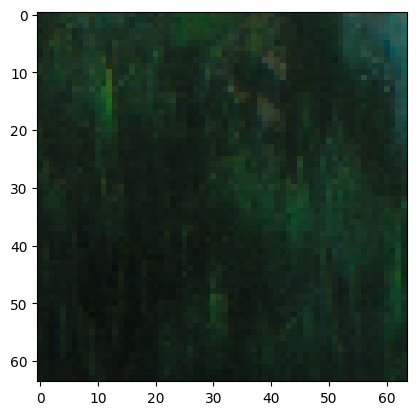

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  24


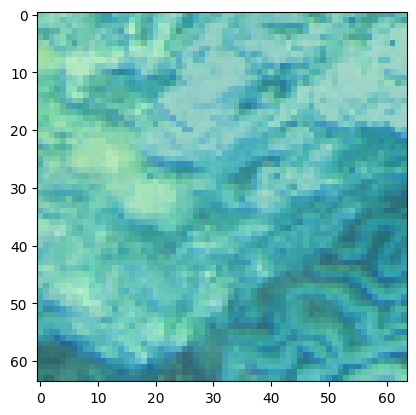

Coarse = {0: 1.0}
Medium = {1: 0.6292565, 7: 0.3707435}
Fine   = {32: 0.6292565, 33: 0.3707435}
Example =  25


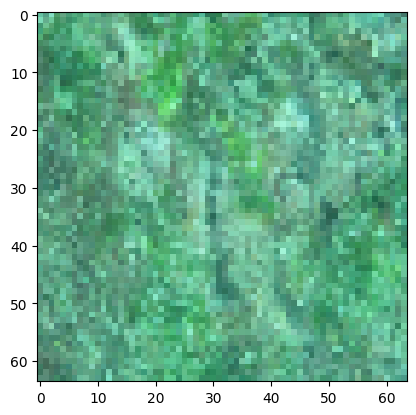

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  26


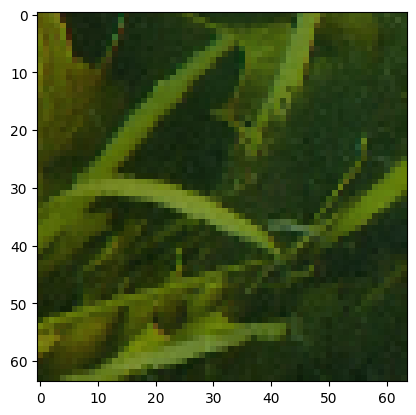

Coarse = {0: 1.0}
Medium = {1: 0.101622, 7: 0.898378}
Fine   = {32: 0.101622, 33: 0.898378}
Example =  27


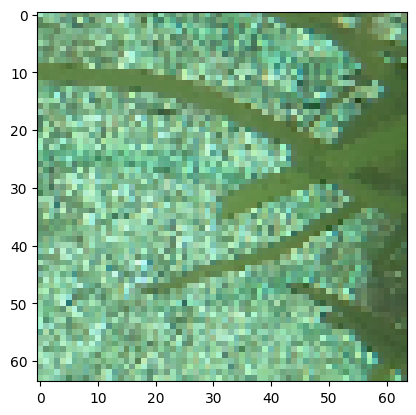

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.04961282, 33: 0.9503872}
Example =  28


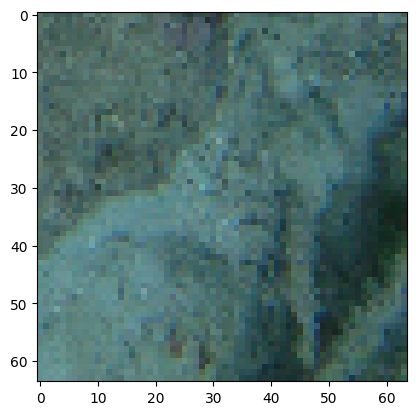

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  29


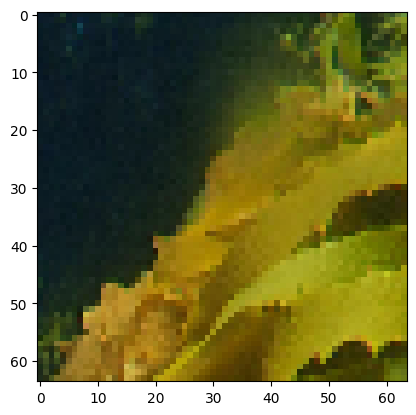

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.004205543, 33: 0.9957945}
Example =  30


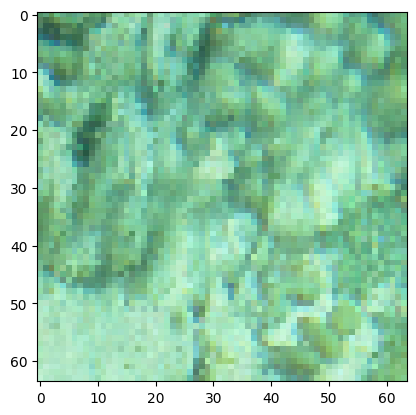

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.102911174, 10: 0.8970888}
Example =  31


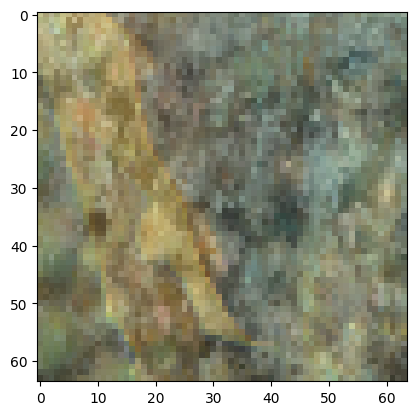

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.62193877, 33: 0.37806123}


In [7]:
for x,y in dataset.train_dataset.take(1):
    for i in range(len(x)):
        print('Example = ', i)
        plt.imshow(x[i])
        plt.show()
        print('Coarse =', {k:v for k,v in enumerate(y[0][i].numpy()) if v != 0}) # coarse lables
        print('Medium =', {k:v for k,v in enumerate(y[1][i].numpy()) if v != 0}) # medium lables
        print('Fine   =', {k:v for k,v in enumerate(y[2][i].numpy()) if v != 0}) # fine lables

In [8]:
for x,y in dataset.train_dataset.take(1):
    image_shape = x.shape[1:]
    coarse_label_shape = y[0].shape[1:]
    medium_label_shape = y[1].shape[1:]
    fine_label_shape = y[2].shape[1:]

## Learning Rate Decay Scheduler

In [9]:
def scheduler(epoch):
    learning_rate_init = train_params["lr"]
    
    if epoch > train_params["decay_exe"]:
        learning_rate_init = train_params["lr"] * (train_params["lr_decay"] ** (epoch-9))
        
    tf.summary.scalar('learning rate', data=learning_rate_init, step=epoch)
        
    return learning_rate_init

# Model Architecture

## Loss Function

In [10]:
coarse_class, medium_class, fine_class = dataset.num_classes

## For Dynamic LossWeights
initial_lw = models.initial_lw({"coarse": coarse_class,
                                 "medium": medium_class,
                                 "fine": fine_class})

lossweight = {'coarse_lw' : K.variable(value = initial_lw['coarse'], dtype="float32", name="coarse_lw"),
             'medium_lw' : K.variable(value = initial_lw['medium'], dtype="float32", name="medium_lw"),
             'fine_lw' : K.variable(value = initial_lw['fine'], dtype="float32", name="fine_lw"),
              'decoder_lw' : 0.0
             }

In [11]:
def margin_loss(y_true, y_proba):
    
    present_error_raw = tf.square(tf.maximum(0., 0.9 - y_proba), name="present_error_raw")
    absent_error_raw = tf.square(tf.maximum(0., y_proba - 0.1), name="absent_error_raw")
    L = tf.add(y_true * present_error_raw, 0.5 * (1.0 - y_true) * absent_error_raw,name="L")
    total_marginloss = tf.reduce_sum(L, axis=1, name="margin_loss")

    return total_marginloss


def CustomLoss(y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f, LW_C, LW_M, LW_F):
    
    ML_c = margin_loss(y_true_c, y_pred_c)*LW_C
    ML_m = margin_loss(y_true_m, y_pred_m)*LW_M
    ML_f = margin_loss(y_true_f, y_pred_f)*LW_F
    
    batch_loss = ML_c + ML_m+ ML_f

    return tf.reduce_mean(batch_loss)

## Architecture

In [12]:
def get_compiled_model():
    
    ## Calling the HD-CapsNet Model
    model = models.HD_CapsNet_Mod_3_3(input_shape     = image_shape, 
                                      input_shape_yc  = coarse_label_shape,
                                      input_shape_ym  = medium_label_shape,
                                      input_shape_yf  = fine_label_shape, 
                                      no_coarse_class = coarse_class, 
                                      no_medium_class = medium_class, 
                                      no_fine_class   = fine_class,
                                      PCap_n_dims     = 8, 
                                      SCap_f_dims     = 16, 
                                      SCap_m_dims     = 32, 
                                      SCap_c_dims     = 64)
    
    ## Saving Model Architecture
    keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)
    
    ## Add Loss for Model
    model.add_loss(CustomLoss(y_true_c            = model.inputs[1], 
                              y_true_m            = model.inputs[2], 
                              y_true_f            = model.inputs[3], 
                              y_pred_c            = model.output[0], 
                              y_pred_m            = model.output[1], 
                              y_pred_f            = model.output[2], 
                              LW_C                = lossweight['coarse_lw'], 
                              LW_M                = lossweight['medium_lw'], 
                              LW_F                = lossweight['fine_lw']
                             )
                  )
    
    ## Compile Model
    model.compile(optimizer='adam',                  
                  metrics={'prediction_fine': 'accuracy',
                           'prediction_medium': 'accuracy',
                           'prediction_coarse': 'accuracy'}
                 )
    return model

## Compile Model

In [13]:
model = get_compiled_model()

In [14]:
model.summary()
# keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)

Model: "HD-CapsNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Image (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 64)   1792        ['Input_Image[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['block1_conv1[0][0]']           
 alization)                                                                                       
                                                                                                  
 block1_conv2 (Conv2D)          (None, 64, 64, 64)   36928       ['batch_normalization[0]

                                                                                                  
 prediction_medium (LengthLayer  (None, 10)          0           ['s_caps_medium[0][0]']          
 )                                                                                                
                                                                                                  
 prediction_fine (LengthLayer)  (None, 38)           0           ['s_caps_fine[0][0]']            
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 2)            0           ['prediction_coarse[0][0]']      
                                                                                                  
 tf.math.subtract_1 (TFOpLambda  (None, 2)           0           ['prediction_coarse[0][0]']      
 )                                                                                                
          

 tf.math.multiply_8 (TFOpLambda  (None, 38)          0           ['input_yf[0][0]',               
 )                                                                'tf.math.square_4[0][0]']       
                                                                                                  
 tf.math.multiply_10 (TFOpLambd  (None, 38)          0           ['tf.math.multiply_9[0][0]',     
 a)                                                               'tf.math.square_5[0][0]']       
                                                                                                  
 tf.math.reduce_sum (TFOpLambda  (None,)             0           ['tf.math.add[0][0]']            
 )                                                                                                
                                                                                                  
 tf.math.reduce_sum_1 (TFOpLamb  (None,)             0           ['tf.math.add_1[0][0]']          
 da)      

## Training Pipeline Alignment

In [15]:
#### Matching the pipeling with model inputs
def pipeline_multi_input_output(image, label):
    label_0 = label[0]
    label_1 = label[1]
    label_2 = label[2]
    return (image, label_0, label_1, label_2), (label_0, label_1, label_2)

training_dataset_match = dataset.train_dataset.map(pipeline_multi_input_output) ## Mixup dataset
val_dataset_match = dataset.val_dataset.map(pipeline_multi_input_output) ## Val Dataset

## Callback

In [16]:
tb = keras.callbacks.TensorBoard(directory+'/tb_logs'+ datetime.now().strftime("%Y%m%d-%H%M%S"))
log = keras.callbacks.CSVLogger(directory+'/log.csv', append=True)

checkpoint = keras.callbacks.ModelCheckpoint(directory+'/epoch-best.h5',
                                             monitor='val_prediction_fine_accuracy',
                                             save_best_only=True, 
                                             save_weights_only=True, 
                                             verbose=1)

change_lw = models.LossWeightsModifier(lossweight = lossweight,
                                       initial_lw = initial_lw,
                                       directory = directory)

lr_decay = keras.callbacks.LearningRateScheduler(scheduler)

## Model Training

In [17]:
model_save_dir = str(directory+'/trained_model.h5')
try:
    model.load_weights(model_save_dir)
except:
    history = model.fit(training_dataset_match,
                        epochs = train_params["n_epochs"],
                        validation_data = val_dataset_match,
                        callbacks = [tb,log,change_lw,lr_decay,checkpoint],
                        verbose=1)
    
    model.save_weights(model_save_dir)

In [18]:
try:
    history_dict = history.history

    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"Coarse": history}, metric = "prediction_coarse_accuracy")
    plotter.plot({"Medium": history}, metric = "prediction_medium_accuracy")
    plotter.plot({"Fine": history}, metric = "prediction_fine_accuracy")
    plt.title("Model Accuracy")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

Trained model weights loaded


In [19]:
try:
    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"loss": history}, metric = "loss")
    plt.title("Model Loss")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

Trained model weights loaded


## Model Analysis

In [20]:
final_model = keras.Model(model.inputs[:1], model.output)

lossfn = models.MarginLoss()
final_model.compile(optimizer='adam', 
                    loss={'prediction_fine' : lossfn,
                          'prediction_medium' : lossfn,
                          'prediction_coarse' : lossfn},

                    loss_weights={'prediction_fine' : lossweight['fine_lw'],
                                  'prediction_medium' : lossweight['medium_lw'],
                                  'prediction_coarse' : lossweight['coarse_lw']},

                    metrics={'prediction_fine': 'accuracy',
                             'prediction_medium': 'accuracy',
                             'prediction_coarse': 'accuracy'
                            }
                   )

In [21]:
results = final_model.evaluate(dataset.test_dataset)
for n in range(len(results)):
    print(str(n+1)+'.',final_model.metrics_names[n], '==>', results[n])
# model_predictions = final_model.predict(dataset.test_dataset)

2023-04-14 09:29:45.273221: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-04-14 09:29:51.588112: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-14 09:29:51.866823: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] RESOURCE_EXHAUSTED: /tmp/tempfile-luthin-516ab3ce-398608-5f94019ee9d83; No space left on device
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


838/838 [==============================] - 71s 61ms/step - loss: 0.1500 - prediction_coarse_loss: 0.0770 - prediction_medium_loss: 0.1740 - prediction_fine_loss: 0.3620 - prediction_coarse_accuracy: 0.8950 - prediction_medium_accuracy: 0.7757 - prediction_fine_accuracy: 0.5375
1. loss ==> 0.15001806616783142
2. prediction_coarse_loss ==> 0.07704316824674606
3. prediction_medium_loss ==> 0.17398281395435333
4. prediction_fine_loss ==> 0.36203479766845703
5. prediction_coarse_accuracy ==> 0.8949548602104187
6. prediction_medium_accuracy ==> 0.7757295370101929
7. prediction_fine_accuracy ==> 0.5375401377677917


In [22]:
def predict_from_pipeline(model, dataset):
    y_pred_c = []
    y_pred_m = []
    y_pred_f = []
    
    y_true_c = []
    y_true_m = []
    y_true_f = []
    for x, y in dataset:
        batch_pred = model.predict(x)
        
        y_true_c.extend(y[0].numpy().tolist())
        y_true_m.extend(y[1].numpy().tolist())
        y_true_f.extend(y[2].numpy().tolist())
        
        y_pred_c.extend(batch_pred[0].tolist())
        y_pred_m.extend(batch_pred[1].tolist())
        y_pred_f.extend(batch_pred[2].tolist())
        
    return np.array(y_true_c), np.array(y_true_m), np.array(y_true_f), np.array(y_pred_c), np.array(y_pred_m), np.array(y_pred_f)

In [23]:
y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f = predict_from_pipeline(final_model, dataset.test_dataset)

  • Confusion_Matrix 

  • COARSE LEVEL 
[[22365   715]
 [ 2100  1618]]

  • MEDIUM LEVEL 
[[   72    94     0     1     1     9     3   510     0    53]
 [   25  1178     3     2     0     6     5   969     1   136]
 [    1     1     0     0     0     0     0    21     0     1]
 [    3    12     0    19     0     1     0    74     0    10]
 [    1     1     0     0     0     0     0    45     0     2]
 [    9    16     0     3     0     1     1    98     0    16]
 [    1    10     0     0     0     1   368   306     0     9]
 [  111   567     1     9     8    20   105 17344     1   796]
 [    0     1     0     0     0     0     0    18     0     0]
 [   25   173     0     8     1    10    12  1683     0  1806]]

  • FINE LEVEL 
[[439  17  27 ...   0  49  13]
 [ 40 227  24 ...   0  11   0]
 [ 33  34  81 ...   1   8   3]
 ...
 [  6   6   8 ...   0   5   0]
 [ 72  17  18 ...   0  78   2]
 [ 10   0   4 ...   0   1 220]]

  • Classification Report 


  • COARSE LEVEL 


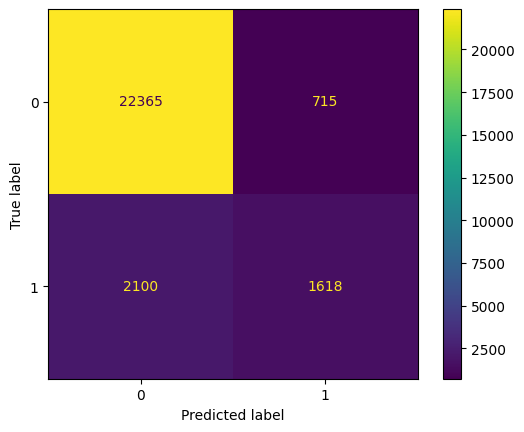

              precision    recall  f1-score   support

           0    0.91416   0.96902   0.94079     23080
           1    0.69353   0.43518   0.53479      3718

    accuracy                        0.89495     26798
   macro avg    0.80385   0.70210   0.73779     26798
weighted avg    0.88355   0.89495   0.88446     26798


  • MEDIUM LEVEL 


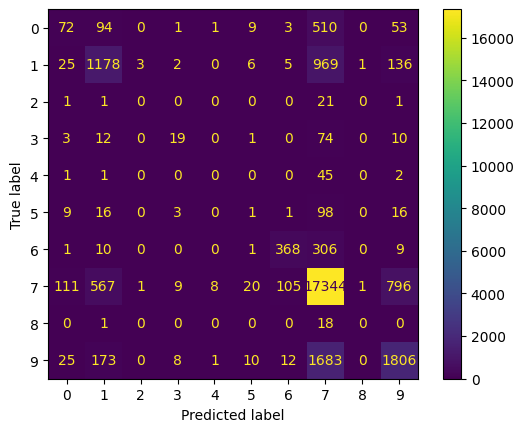

              precision    recall  f1-score   support

           0    0.29032   0.09690   0.14531       743
           1    0.57379   0.50667   0.53815      2325
           2    0.00000   0.00000   0.00000        24
           3    0.45238   0.15966   0.23602       119
           4    0.00000   0.00000   0.00000        49
           5    0.02083   0.00694   0.01042       144
           6    0.74494   0.52950   0.61901       695
           7    0.82324   0.91467   0.86655     18962
           8    0.00000   0.00000   0.00000        19
           9    0.63839   0.48575   0.55170      3718

    accuracy                        0.77573     26798
   macro avg    0.35439   0.27001   0.29672     26798
weighted avg    0.75036   0.77573   0.75758     26798


  • FINE LEVEL 


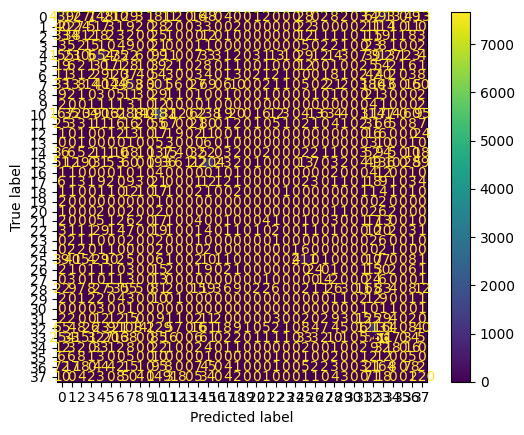

              precision    recall  f1-score   support

           0    0.28768   0.26768   0.27732      1640
           1    0.44336   0.42830   0.43570       530
           2    0.27931   0.25796   0.26821       314
           3    0.10714   0.14151   0.12195       106
           4    0.45480   0.41550   0.43426      1574
           5    0.10119   0.06967   0.08252       244
           6    0.07812   0.06920   0.07339       289
           7    0.32450   0.30733   0.31568      1474
           8    0.03896   0.03125   0.03468        96
           9    0.00000   0.00000   0.00000        30
          10    0.42501   0.44991   0.43710      3294
          11    0.29004   0.15654   0.20334       428
          12    0.13235   0.08491   0.10345       106
          13    0.00000   0.00000   0.00000        31
          14    0.12121   0.05565   0.07628       575
          15    0.58904   0.61366   0.60110      1962
          16    0.06667   0.03448   0.04545        29
          17    0.03125   0

/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [24]:
metrics.lvl_wise_metric([y_true_c, y_true_m, y_true_f],
                        [y_pred_c, y_pred_m, y_pred_f])

In [25]:
h_measurements,consistency,exact_match = metrics.hmeasurements([y_true_c, y_true_m, y_true_f],
                                                               [y_pred_c, y_pred_m, y_pred_f],
                                                               dataset.get_tree())
print('\nHierarchical Precision =',h_measurements[0],
      '\nHierarchical Recall =', h_measurements[1],
      '\nHierarchical F1-Score =',h_measurements[2],
      '\nConsistency = ', consistency,
      '\nExact Match = ', exact_match,
     )


Hierarchical Precision = 0.7328724780456253 
Hierarchical Recall = 0.747617981441401 
Hierarchical F1-Score = 0.7388246813017318 
Consistency =  0.9236883349503694 
Exact Match =  0.5184715277259497
